#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### 'CarPrice.csv' file is loaded using pandas.

In [2]:
data = pd.read_csv('CarPrice.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Checking for missing values in the dataset.

In [3]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Histogram is plotted to examine the distribution of the price variable.

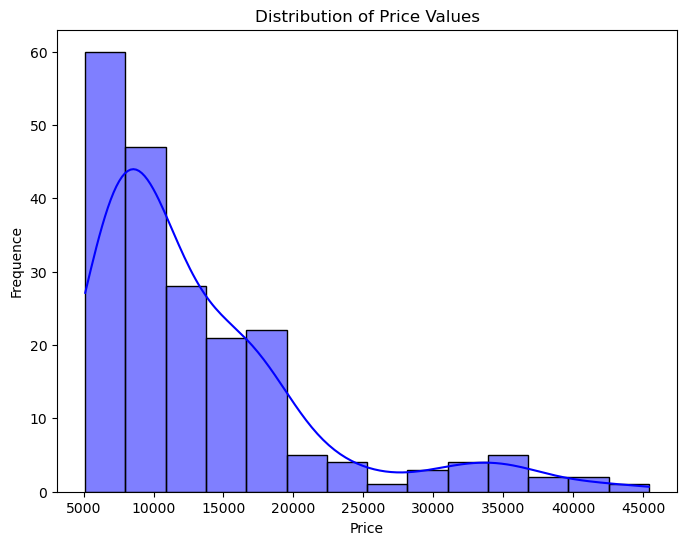

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], kde=True, color="blue")
plt.title("Distribution of Price Values")
plt.xlabel("Price")
plt.ylabel("Frequence")
plt.show()

#### The first 5 unique values in categorical columns are examined

In [7]:
string_columns = data.select_dtypes(include = 'object').columns
unique_values = {col: data[col].unique()[:5] for col in string_columns}

unique_values

{'CarName': array(['alfa-romero giulia', 'alfa-romero stelvio',
        'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls'],
       dtype=object),
 'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'doornumber': array(['two', 'four'], dtype=object),
 'carbody': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object),
 'enginelocation': array(['front', 'rear'], dtype=object),
 'enginetype': array(['dohc', 'ohcv', 'ohc', 'l', 'rotor'], dtype=object),
 'cylindernumber': array(['four', 'six', 'five', 'three', 'twelve'], dtype=object),
 'fuelsystem': array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi'], dtype=object)}

#### New variable is created by extracting the first word from the car names.

In [8]:
data['CarBrand'] = data['CarName'].apply(lambda x: x.split()[0])
data['CarBrand']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarBrand, Length: 205, dtype: object

#### One-hot encoding is applied to 'fueltype', 'carbody', 'drivewheel', and 'CarBrand' variables.

In [9]:
encoded_data = pd.get_dummies(data,
                              columns = ['fueltype', 'carbody', 'drivewheel', 'CarBrand'],
                              drop_first = True)
encoded_data[encoded_data.select_dtypes('bool').columns] = encoded_data.select_dtypes('bool').astype(int)
encoded_data.head()

,car_ID,symboling,CarName,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,1,3,alfa-romero giulia,std,two,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,std,two,front,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,std,two,front,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,std,four,front,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,std,four,front,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


#### Unique values in door and cylinder number variables are listed for see their variables

In [10]:
print(data['doornumber'].value_counts())
print(data['cylindernumber'].value_counts())

doornumber
four    115
two      90
Name: count, dtype: int64
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


#### String values in door and cylinder numbers are mapped to numerical values.

In [11]:
door_number_map = {'two': 2, 'four': 4}
cylinder_number_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}

encoded_data['doornumber'] = data['doornumber'].map(door_number_map)
encoded_data['cylindernumber'] = data['cylindernumber'].map(cylinder_number_map)

print(encoded_data['doornumber'].head())
print(encoded_data['cylindernumber'].head())

0    2
1    2
2    2
3    4
4    4
Name: doornumber, dtype: int64
0    4
1    4
2    6
3    4
4    5
Name: cylindernumber, dtype: int64


#### The 'CarName' column is removed from the dataset.

In [12]:
encoded_data.drop(['CarName'], axis = 1, inplace = True)
encoded_data.head()

,car_ID,symboling,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_toyouta,CarBrand_vokswagen,CarBrand_volkswagen,CarBrand_volvo,CarBrand_vw
0,1,3,std,2,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
1,2,3,std,2,front,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,0,0,0
2,3,1,std,2,front,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,0,0,0
3,4,2,std,4,front,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,0,0,0
4,5,2,std,4,front,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,0,0,0


#### Checking which categorical columns still unencoded.

In [13]:
object_columns = encoded_data.select_dtypes(include = 'object').columns
print(object_columns)

Index(['aspiration', 'enginelocation', 'enginetype', 'fuelsystem'], dtype='object')


#### Value counts for the remaining categorical variables are checked.

In [14]:
print(encoded_data['aspiration'].value_counts())
print(encoded_data['enginelocation'].value_counts())
print(encoded_data['enginetype'].value_counts())
print(encoded_data['fuelsystem'].value_counts())


aspiration
std      168
turbo     37
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


#### One-hot encoding is applied to 'aspiration', 'enginelocation', 'enginetype', and 'fuelsystem' columns.

In [15]:
categorical_columns = ['aspiration', 'enginelocation', 'enginetype', 'fuelsystem']
encoded_data = pd.get_dummies(encoded_data,
                              columns = categorical_columns,
                              drop_first = True)
encoded_data[encoded_data.select_dtypes('bool').columns] = encoded_data.select_dtypes('bool').astype(int)
encoded_data.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,1,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,1,0,0,0,0,0,1,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,1,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,1,0,0


In [16]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_ID                205 non-null    int64  
 1   symboling             205 non-null    int64  
 2   doornumber            205 non-null    int64  
 3   wheelbase             205 non-null    float64
 4   carlength             205 non-null    float64
 5   carwidth              205 non-null    float64
 6   carheight             205 non-null    float64
 7   curbweight            205 non-null    int64  
 8   cylindernumber        205 non-null    int64  
 9   enginesize            205 non-null    int64  
 10  boreratio             205 non-null    float64
 11  stroke                205 non-null    float64
 12  compressionratio      205 non-null    float64
 13  horsepower            205 non-null    int64  
 14  peakrpm               205 non-null    int64  
 15  citympg               2

#### The 'car_ID' column, which is unnecessary for the model, is dropped.

In [17]:
encoded_data.drop(['car_ID'], axis = 1, inplace = True)

In [18]:
encoded_data.corr()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,...,0.037513,-0.013597,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,...,0.022095,-0.052138,-0.159463,0.020525,-0.137757,0.191491,-0.079143,0.025019,-0.146272,-0.079143
wheelbase,-0.531954,0.447357,1.000000,0.874587,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,...,-0.183195,0.166152,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.398568,0.874587,1.000000,0.841118,0.491029,0.877728,0.430672,0.683360,0.606454,...,-0.118320,0.244053,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,...,-0.124446,0.348869,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_idi,-0.194311,0.191491,0.308346,0.212679,0.233880,0.284631,0.217275,-0.024544,0.069594,0.054451,...,-0.092384,-0.085556,-0.046383,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuelsystem_mfi,0.122067,-0.079143,-0.033294,-0.004831,0.012832,-0.101245,0.034431,-0.024707,0.049033,0.070030,...,-0.019672,-0.018218,-0.009877,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuelsystem_mpfi,0.012532,0.025019,0.348891,0.511374,0.461896,0.108685,0.520220,0.392551,0.483520,0.419335,...,0.004585,0.282760,-0.059039,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuelsystem_spdi,0.181939,-0.146272,-0.117359,-0.079790,-0.046399,-0.278615,-0.002434,-0.075619,0.004490,-0.004213,...,-0.060209,-0.055759,-0.030229,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


Train Test Split

#### Defining Independent (X) and Dependent (y) Variables

In [19]:
X = encoded_data.drop(columns = ['price'])
y = encoded_data['price']

#### Splitting the Data into Training and Test Sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### The model is trained, and predictions are made.

In [21]:
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

#### Mean Error, Mean Squared Error, and R2 Score are calculated.

In [22]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) : {mse: .2f}")
print(f"Mean Absolute Error (MAE) : {mae: .2f}")
print(f"R2 Score (R2) : {r2: .2f}")

Mean Squared Error (MSE) :  8130814.69
Mean Absolute Error (MAE) :  1950.47
R2 Score (R2) :  0.90


#### Visualization compares the actual and predicted values to evaluate the model's performance.

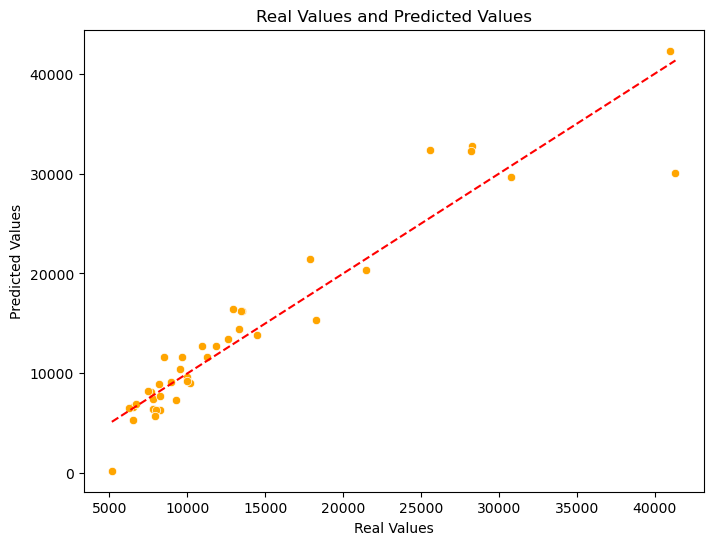

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Real Values and Predicted Values")
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.show()
